In [3]:
!pip install BeautifulSoup
!pip install bs4

Defaulting to user installation because normal site-packages is not writeable
  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      Traceback (most recent call last):
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(c

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\50749314877\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from re import U

In [5]:
csv_url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"

df_csv = pd.read_csv(csv_url)

df_csv.head()
df_csv.columns

Index(['Index', ' Height(Inches)"', ' "Weight(Pounds)"'], dtype='object')

In [6]:
response = requests.get("https://jsonplaceholder.typicode.com/users")

users = response.json()

df_users = pd.DataFrame(users)

df_users.columns

dff = df_users[['name', 'email', 'phone']]

dfiltrado = dff[dff['email'].str.endswith('@dana.io')]


In [7]:
#df_users.to_csv("users.csv", index=False)
dfcarregado = pd.read_csv("users.csv")

dfcarregado

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '..."
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config..."
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im..."
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit..."
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central..."


In [8]:
url = "https://quotes.toscrape.com/"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

df_quotes = pd.DataFrame({'Quote': [quote.text for quote in soup.find_all('span', class_='text')]})

df_quotes.head()

,Quote
0,“The world as we have created it is a process ...
1,"“It is our choices, Harry, that show what we t..."
2,“There are only two ways to live your life. On...
3,"“The person, be it gentleman or lady, who has ..."
4,"“Imperfection is beauty, madness is genius and..."


<Axes: >

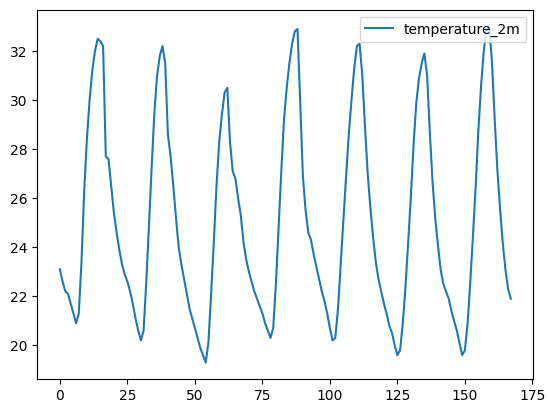

In [9]:
api_url = 'https://api.open-meteo.com/v1/forecast?latitude=-23.55&longitude=-46.63&hourly=temperature_2m&timezone=America/Sao_Paulo'

response = requests.get(api_url)

data = response.json()

df_previsao = pd.DataFrame(data['hourly'])

df_previsao.head()
df_previsao.plot()

In [10]:
latitude = -23.55
longitude = -46.63

startdate = '2024-01-01'
enddate = '2024-12-31'

url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={startdate}&end_date={enddate}&hourly=temperature_2m&daily=precipitation_sum'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    hourly_data = data.get("hourly", {})
    daily_data = data.get("daily", {})

    time_hourly = hourly_data.get("time", [])
    temp_hourly = hourly_data.get("temperature_2m", [])

    time_daily = daily_data.get("time", [])
    precip_daily = daily_data.get("precipitation_sum", [])

    df_hourly = pd.DataFrame({'datetime': time_hourly, 'temperature_2m': temp_hourly}) # Criando um DataFrame a partir dos dados horários

    df_daily = pd.DataFrame({'date': time_daily, 'precipitation_sum': precip_daily}) # Criando um DataFrame a partir dos dados diários

    print(df_hourly)

else:
    print('Deu Merda na requisição.')
    print(response.status_code)

df_hourly

              datetime  temperature_2m
0     2024-01-01T00:00            19.4
1     2024-01-01T01:00            18.6
2     2024-01-01T02:00            18.3
3     2024-01-01T03:00            18.1
4     2024-01-01T04:00            18.1
...                ...             ...
8779  2024-12-31T19:00            25.2
8780  2024-12-31T20:00            24.7
8781  2024-12-31T21:00            24.5
8782  2024-12-31T22:00            23.2
8783  2024-12-31T23:00            22.5

[8784 rows x 2 columns]


,datetime,temperature_2m
0,2024-01-01T00:00,19.4
1,2024-01-01T01:00,18.6
2,2024-01-01T02:00,18.3
3,2024-01-01T03:00,18.1
4,2024-01-01T04:00,18.1
...,...,...
8779,2024-12-31T19:00,25.2
8780,2024-12-31T20:00,24.7
8781,2024-12-31T21:00,24.5
8782,2024-12-31T22:00,23.2


In [ ]:
url = "https://api.open-meteo.com/v1/forecast?latitude=-23.55&longitude=-46.63&hourly=temperature_2m&timezone=America/Sao_Paulo"
def pegadados(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data['hourly'])
        df = df.dropna()
        return df
    
df = pegadados(url)

#df.to_csv("test.csv")